In [1]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [3]:
# Confirm start and end dates of data set. Confirm number of employees.
print(df['Emp_ID'].nunique())
print(df['MMM-YY'].max())
print(df['MMM-YY'].min())

2381
2017-12-01
2016-01-01


In [4]:
# Get start date of each employee
gr_df = df.groupby('Emp_ID')
start_date = gr_df['Dateofjoining'].min()
start_date

Emp_ID
1       2015-12-24
2       2017-11-06
4       2016-12-07
5       2016-01-09
6       2017-07-31
           ...    
2784    2012-10-15
2785    2017-08-28
2786    2015-07-31
2787    2015-07-21
2788    2017-06-08
Name: Dateofjoining, Length: 2381, dtype: object

In [5]:
# Confirm where Na values are . . 


In [6]:
# Get finish date of each employee. If last day is blank, employee still here (Dec 2017)
att_emp = df.dropna()
len(att_emp)
att_emp = att_emp.reset_index()
att_emp.columns


Index(['index', 'MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [7]:
ae_se = att_emp[['Emp_ID','LastWorkingDate']]
ae_se


,Emp_ID,LastWorkingDate
0,1,2016-03-11
1,4,2017-04-27
2,5,2016-03-07
3,8,2017-11-15
4,12,2016-12-21
...,...,...
1611,2779,2017-02-14
1612,2782,2016-08-16
1613,2785,2017-10-28
1614,2786,2016-09-22


In [8]:
# create new df to store information
# add employee name, columns for start date, finish date & tenure
new_df = pd.DataFrame(start_date)

new_df = new_df.reset_index()
new_df = pd.merge(new_df, ae_se, how='left', on=['Emp_ID'])
new_df['Tenure']=""
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure
0,1,2015-12-24,2016-03-11,
1,2,2017-11-06,NaN,
2,4,2016-12-07,2017-04-27,
3,5,2016-01-09,2016-03-07,
4,6,2017-07-31,NaN,
...,...,...,...,...
2376,2784,2012-10-15,NaN,
2377,2785,2017-08-28,2017-10-28,
2378,2786,2015-07-31,2016-09-22,
2379,2787,2015-07-21,2016-06-20,


In [9]:
# Formula to calculate Tenure
new_df['Current_status'] = new_df['LastWorkingDate']
# new_df['Current_status'] = new_df['Current_status'].fillna(1)


new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_status
0,1,2015-12-24,2016-03-11,,2016-03-11
1,2,2017-11-06,NaN,,NaN
2,4,2016-12-07,2017-04-27,,2017-04-27
3,5,2016-01-09,2016-03-07,,2016-03-07
4,6,2017-07-31,NaN,,NaN
...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,NaN
2377,2785,2017-08-28,2017-10-28,,2017-10-28
2378,2786,2015-07-31,2016-09-22,,2016-09-22
2379,2787,2015-07-21,2016-06-20,,2016-06-20


In [10]:
# If LastWorkingDate ==Nan current_status == 1
# else current

### 7/11/22 From this line, Shannon's additions to code from 3 Nov Evening
# 1 for Staying (i.e., NaN for 'LastWorkingDate'), 2 for Leaving (i.e., specific date provided for 'LastWorkingDate')
# Code below replace NaN with 1. 
# Enables use of groupby or sort_values to examine sub-group trends

new_df['Current_status'] = new_df['Current_status'].fillna(1)
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_status
0,1,2015-12-24,2016-03-11,,2016-03-11
1,2,2017-11-06,NaN,,1
2,4,2016-12-07,2017-04-27,,2017-04-27
3,5,2016-01-09,2016-03-07,,2016-03-07
4,6,2017-07-31,NaN,,1
...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,1
2377,2785,2017-08-28,2017-10-28,,2017-10-28
2378,2786,2015-07-31,2016-09-22,,2016-09-22
2379,2787,2015-07-21,2016-06-20,,2016-06-20


In [11]:
# Code below replaces specific leaving date with 2 in 'Current_status' column

new_df['Current_status'] = np.where((new_df.Current_status != 1), 2, new_df.Current_status)
new_df

,Emp_ID,Dateofjoining,LastWorkingDate,Tenure,Current_status
0,1,2015-12-24,2016-03-11,,2
1,2,2017-11-06,NaN,,1
2,4,2016-12-07,2017-04-27,,2
3,5,2016-01-09,2016-03-07,,2
4,6,2017-07-31,NaN,,1
...,...,...,...,...,...
2376,2784,2012-10-15,NaN,,1
2377,2785,2017-08-28,2017-10-28,,2
2378,2786,2015-07-31,2016-09-22,,2
2379,2787,2015-07-21,2016-06-20,,2


In [12]:
# Check number of employees staying and number of employees leaving

new_df['Current_status'].value_counts()

# Current_status: 1 = Staying (n=765), 2 = Leaving (n=1616)

2    1616
1     765
Name: Current_status, dtype: int64

In [13]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [14]:
## Rapid code for show and tell

df_wk = df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
df_mostRecent = df_wk.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)
df_mostRecent

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2
1,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
2,2017-12-01,2781,25,Male,C23,Master,46952,2017-02-17,NaN,2,2,2366500,4
3,2017-12-01,2778,35,Male,C13,Master,50180,2017-11-29,NaN,2,2,0,1
4,2017-12-01,2775,27,Male,C9,College,85112,2017-10-02,NaN,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,136,37,Female,C10,College,47009,2015-10-02,2016-01-05,1,1,0,1
2377,2016-01-01,105,38,Male,C4,College,67931,2015-09-18,2016-01-06,1,1,0,1
2378,2016-01-01,86,35,Male,C2,Master,49510,2015-05-28,2016-01-27,1,1,0,1
2379,2016-01-01,70,35,Male,C20,Bachelor,19235,2015-10-08,2016-01-29,1,1,0,1


In [15]:
df_mostRecent['Emp_ID'].nunique()

2381

In [16]:
df_mostRecent['Current_status'] = df_mostRecent['LastWorkingDate'].fillna(1)
df_mostRecent.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Current_status
0,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2,1
1,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4,1
2,2017-12-01,2781,25,Male,C23,Master,46952,2017-02-17,NaN,2,2,2366500,4,1
3,2017-12-01,2778,35,Male,C13,Master,50180,2017-11-29,NaN,2,2,0,1,1
4,2017-12-01,2775,27,Male,C9,College,85112,2017-10-02,NaN,3,3,0,1,1


In [17]:
df_mostRecent['Current_status'] = np.where((df_mostRecent.Current_status != 1), 2, df_mostRecent.Current_status)
df_mostRecent

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Current_status
0,2017-12-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,411480,2,1
1,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4,1
2,2017-12-01,2781,25,Male,C23,Master,46952,2017-02-17,NaN,2,2,2366500,4,1
3,2017-12-01,2778,35,Male,C13,Master,50180,2017-11-29,NaN,2,2,0,1,1
4,2017-12-01,2775,27,Male,C9,College,85112,2017-10-02,NaN,3,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2016-01-01,136,37,Female,C10,College,47009,2015-10-02,2016-01-05,1,1,0,1,2
2377,2016-01-01,105,38,Male,C4,College,67931,2015-09-18,2016-01-06,1,1,0,1,2
2378,2016-01-01,86,35,Male,C2,Master,49510,2015-05-28,2016-01-27,1,1,0,1,2
2379,2016-01-01,70,35,Male,C20,Bachelor,19235,2015-10-08,2016-01-29,1,1,0,1,2


In [18]:
df_mostRecent['Current_status'].value_counts()

2    1616
1     765
Name: Current_status, dtype: int64

In [19]:
# df_mostRecent: Dataframe created from original df 
## first sorted by most recent MMM-YY to get latest record of employee data
## Then drop duplicates and keep only the latest record. Only one record per employee id with latest employment status.
## Create variable 'Current_status' that notes 1=Staying and 2=Leaving

# From this line: Use df_mostRecent to create summary statistics based on groupby('Current_status')
## Answers with descriptives whether on average which set of employees had better performance (e.g.,'Quarterly Rating', '')
## Perhaps obtain average 'Quarterly Rating' across all the months recorded for each employee.
## Current 'Quarterly Rating' is their performance rating in the latest quarter

In [20]:
mostRecent_by_StayLeave = df_mostRecent.groupby('Current_status')
sumStats_by_StayLeave = pd.DataFrame(mostRecent_by_StayLeave[["Age",
                                                              "Salary",
                                                              "Quarterly Rating",
                                                              "Total Business Value"]].aggregate([np.mean, np.median,
                                                                                                  np.var, np.std]).round(2))
sumStats_by_StayLeave

Age                        Salary                       \
                 mean median    var   std      mean median           var   
Current_status                                                             
1               34.35     34  34.58  5.88  67662.91  64154  8.748923e+08   
2               33.34     33  36.07  6.01  55391.40  51630  7.249534e+08   

                         Quarterly Rating                     \
                     std             mean median   var   std   
Current_status                                                 
1               29578.58             2.03      2  1.10  1.05   
2               26924.96             1.14      1  0.19  0.44   

               Total Business Value                                    
                               mean  median           var         std  
Current_status                                                         
1                         743290.85  334800  3.595556e+12  1896195.06  
2                          41188.42       0  3.795948e+10   194831.93

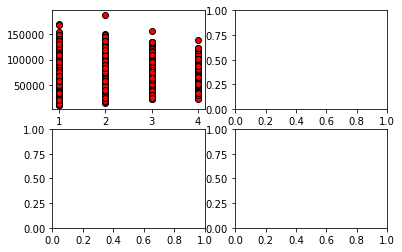

In [23]:
x = df_mostRecent["Quarterly Rating"]
y = df_mostRecent["Salary"]

fig, axs = plt.subplots(2,2)
axs[0,0].scatter(x,y,facecolors="red", edgecolors = "black")
#axs[0,1]
#axs[1,0]
